### Setting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 

import xgboost as xgb
from imblearn.combine import *
from imblearn.over_sampling import *
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### 데이터 전처리

In [41]:
df=pd.read_csv('./genres_v2.csv')
df.drop(['Unnamed: 0', 'type', 'id', 'time_signature', 'track_href','analysis_url','uri'], axis=1, inplace=True)
nalist=df[(df['song_name'].isnull()==True)&(df['title'].isnull()==True)].index
df.drop(nalist, axis=0, inplace=True)

In [42]:
song_name=df['song_name']
song_name.dropna(inplace=True)
title=df['title']
title.dropna(inplace=True)

In [43]:
idx_df=pd.concat([song_name, title], axis=0)
idx_df=pd.DataFrame(idx_df)
df.drop(['song_name', 'title'], axis=1, inplace=True)
df['title']=idx_df
df=df.set_index(['title'])

In [44]:
encoder=LabelEncoder()
encoder.fit(df['genre'])
labels=encoder.transform(df['genre'])

In [57]:
print('인코딩 클래스 : ',encoder.classes_)

인코딩 클래스 :  ['Dark Trap' 'Emo' 'Hiphop' 'Pop' 'Rap' 'RnB' 'Trap Metal'
 'Underground Rap' 'dnb' 'hardstyle' 'psytrance' 'techhouse' 'techno'
 'trance' 'trap']


In [45]:
df['genre']=labels

In [46]:
df['genre'].value_counts()

7     5875
0     4578
2     3022
13    2999
14    2987
11    2975
8     2966
10    2961
12    2956
9     2936
5     2099
6     1956
4     1848
1     1680
3      461
Name: genre, dtype: int64

In [47]:
df[df['genre']==0]=7
df[df['genre']==1]=7
df[df['genre']==2]=7
df[df['genre']==3]=7
df[df['genre']==4]=7
df[df['genre']==5]=7
df[df['genre']==6]=7

In [48]:
df['genre'].value_counts()

7     21519
13     2999
14     2987
11     2975
8      2966
10     2961
12     2956
9      2936
Name: genre, dtype: int64

### 모델 준비

In [49]:
X=df.iloc[:,:-1]
y=df['genre']
y.astype('category')

title
Mercury: Retrograde                              7
Pathology                                        7
Symbiote                                         7
ProductOfDrugs (Prod. The Virus and Antidote)    7
Venom                                            7
                                                ..
Euphoric Hardstyle                               9
Greatest Hardstyle Playlist                      9
Best of Hardstyle 2020                           9
Euphoric Hardstyle                               9
Best of Hardstyle 2020                           9
Name: genre, Length: 42299, dtype: category
Categories (8, int64): [7, 8, 9, 10, 11, 12, 13, 14]

### 불균형 데이터 전처리

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=23)
smote=SMOTE(random_state=0)
X_train_over, y_train_over=smote.fit_sample(X_train, y_train)

In [51]:
y_train_over=pd.get_dummies(y_train_over)
y_test=pd.get_dummies(y_test)

### 머신러닝 모델&평가지표

In [52]:
def get_clf_eval(y_test, y_pred, probs):
#     confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, probs)
    print('정확도:{0:.4f}, 정밀도 {1:.4f}, 재현율 :{2:.4f}, F1:{3:.4f}, AUC:{4:4f}'.format(accuracy, precision,recall,F1,AUC))

In [53]:
from sklearn.preprocessing import Binarizer
def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Treshold value'); plt.ylabel('Precision and Recall Value')
    plt.legend();plt.grid()
    plt.show()

In [54]:
from xgboost import XGBClassifier

In [55]:
from sklearn.metrics import precision_recall_curve

정확도:0.9905, 정밀도 0.9956, 재현율 :0.9859, F1:0.9907, AUC:0.999636


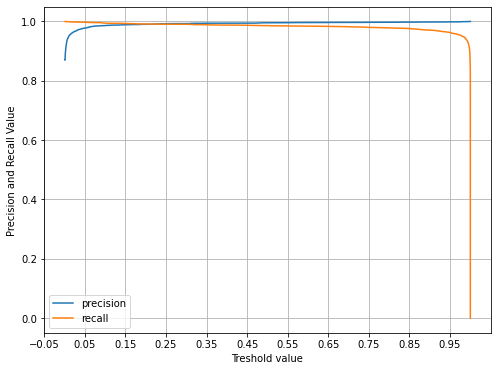

None
정확도:0.9989, 정밀도 0.9882, 재현율 :0.9966, F1:0.9924, AUC:0.999982


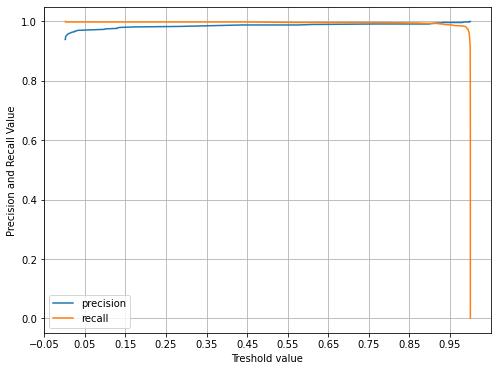

None
정확도:0.9879, 정밀도 0.9128, 재현율 :0.9217, F1:0.9172, AUC:0.997231


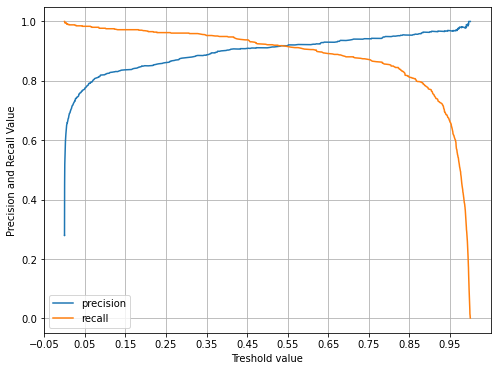

None
정확도:0.9888, 정밀도 0.9516, 재현율 :0.8916, F1:0.9206, AUC:0.996303


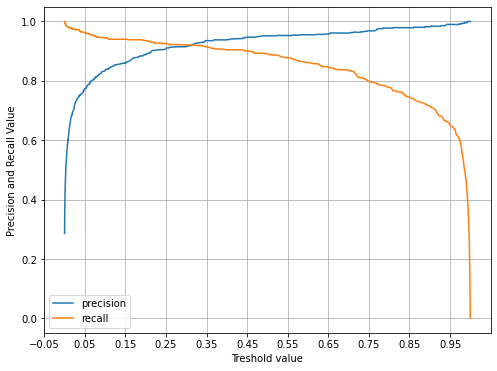

None
정확도:0.9885, 정밀도 0.8991, 재현율 :0.9326, F1:0.9156, AUC:0.997226


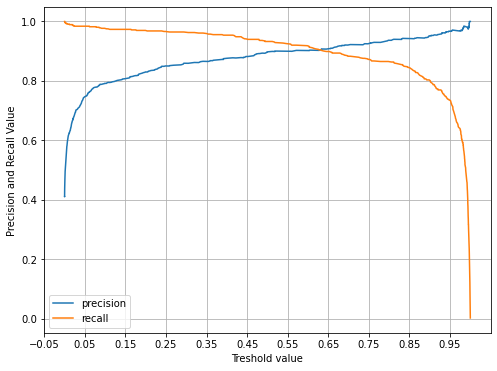

None
정확도:0.9814, 정밀도 0.8770, 재현율 :0.8483, F1:0.8624, AUC:0.993167


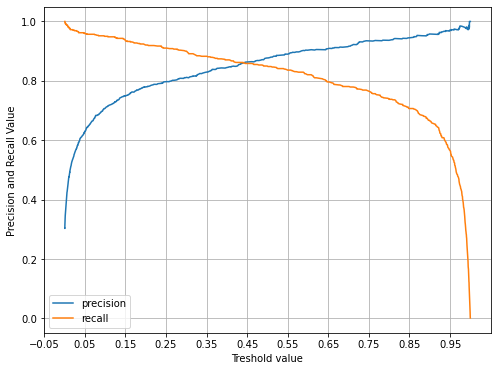

None
정확도:0.9852, 정밀도 0.9068, 재현율 :0.8876, F1:0.8971, AUC:0.995220


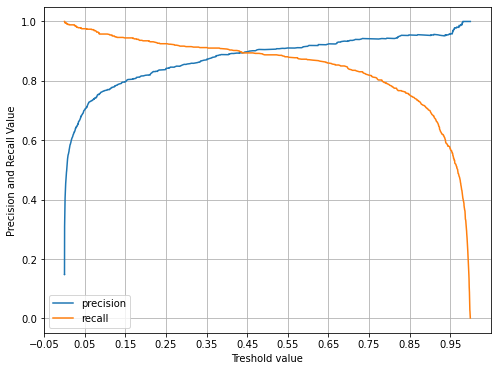

None
정확도:0.9820, 정밀도 0.8656, 재현율 :0.8687, F1:0.8671, AUC:0.994513


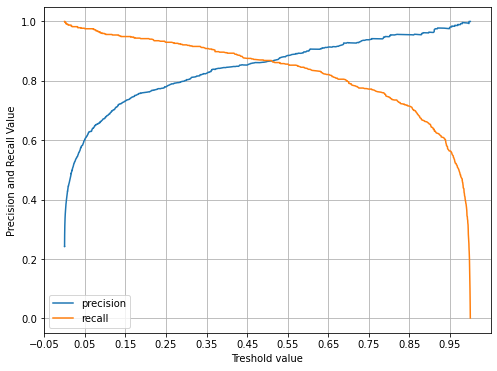

None


In [56]:
for i in range(7, 15):
    xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, eta=0.1,objective='binary:logistic',eval_metric='logloss')
    xgb_wrapper.fit(X_train_over, y_train_over[i])
    w_preds=xgb_wrapper.predict(X_test)
    w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]
    get_clf_eval(y_test[i], w_preds, w_pred_proba)
    precision_recall_curve_plot(y_test[i], w_pred_proba)